`Dataset` UCI Human Activity Recognition  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [ ]:
feature_df = pd.read_csv("/content/drive/MyDrive/202209/euron/features.txt", sep='\s+', names=['index', 'column'])
feature_df

,index,column
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [ ]:
feature_num_df = feature_df.groupby('column').count()

In [ ]:
feature_num_df[feature_num_df['index']>1]

,index
column,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


In [ ]:
count_df = pd.DataFrame(data=feature_df.groupby('column').cumcount(), columns=['count'])
new_column_df = feature_df.join(count_df)

In [ ]:
new_column_df

,index,column,count
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


In [ ]:
new_column_df['column'] = new_column_df[['column', 'count']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)

In [ ]:
new_column_df['column']

0                         tBodyAcc-mean()-X
1                         tBodyAcc-mean()-Y
2                         tBodyAcc-mean()-Z
3                          tBodyAcc-std()-X
4                          tBodyAcc-std()-Y
                       ...                 
556        angle(tBodyGyroMean,gravityMean)
557    angle(tBodyGyroJerkMean,gravityMean)
558                    angle(X,gravityMean)
559                    angle(Y,gravityMean)
560                    angle(Z,gravityMean)
Name: column, Length: 561, dtype: object

In [3]:
X_train = pd.read_csv("/content/drive/MyDrive/202209/euron/X_train.csv")
X_test = pd.read_csv("/content/drive/MyDrive/202209/euron/X_test.csv")
y_train = pd.read_csv("/content/drive/MyDrive/202209/euron/y_train.txt", sep='\s+', names=['action'])
y_test = pd.read_csv("/content/drive/MyDrive/202209/euron/y_test.txt", sep='\s+', names=['action'])

In [4]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [5]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [11]:
dt_clf = DecisionTreeClassifier(random_state=100)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(dt_clf.get_params())
print("Accuracy: {:.4f}".format(acc))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 100, 'splitter': 'best'}
Accuracy: 0.8507


In [14]:
dt_clf.get_depth()

18

In [25]:
params = {
    'max_depth':[4,8,12,16,24],
    'min_samples_split':[2, 8, 16]
}

gridcv = GridSearchCV(dt_clf, param_grid=params, cv=5, n_jobs=-1)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16, 24],
                         'min_samples_split': [2, 8, 16]})

In [26]:
# GridSearchCV 객체의 속성 cv_results_, best_score_, best_params_, best_estimator_

cv_result_df = pd.DataFrame(gridcv.cv_results_)
cv_result_df[['param_max_depth', 'param_min_samples_split', 'mean_test_score']]

,param_max_depth,param_min_samples_split,mean_test_score
0,4,2,0.841954
1,4,8,0.841954
2,4,16,0.841954
3,8,2,0.852157
4,8,8,0.852567
5,8,16,0.854743
6,12,2,0.841959
7,12,8,0.846176
8,12,16,0.841824
9,16,2,0.845631


In [27]:
print(gridcv.best_score_)
print(gridcv.best_params_)

best_dt = gridcv.best_estimator_
pred = best_dt.predict(X_test)
acc = accuracy_score(y_test, pred)

print(best_dt.get_params())
print("Accuracy: {:.4f}".format(acc))

0.854742805347836
{'max_depth': 8, 'min_samples_split': 16}
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.0, 'random_state': 100, 'splitter': 'best'}
Accuracy: 0.8717


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

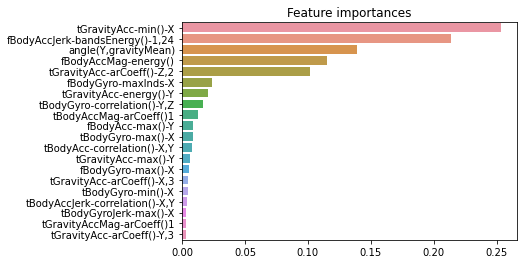

In [31]:
feature_df = pd.Series(best_dt.feature_importances_, index=X_train.columns)
feature_df = feature_df.sort_values(ascending=False)[:20]

plt.title("Feature importances")
sns.barplot(x=feature_df, y=feature_df.index)
plt.show()

In [32]:
rf_clf = RandomForestClassifier(random_state=100)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print("Accuracy: {:.4f}".format(acc))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.9321


In [33]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [41]:
n_estimators = [100, 500, 1000]
for n in n_estimators:
  pred = RandomForestClassifier(n_estimators=n).fit(X_train, y_train).predict(X_test)
  print("{} Estimators : {:.4f}".format(n, accuracy_score(y_test, pred)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


100 Estimators : 0.9287


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


500 Estimators : 0.9298


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1000 Estimators : 0.9277
